# EDA и research-анализ

**Описание полей датасета:**

- ```set_id(Integer)``` – уникальный идентфикатор для каждого набора LEGO
- ```name(String)``` – название набора LEGO
- ```year(Integer)``` – год выпуска набора LEGO
- ```theme (String)``` – основная тема набора LEGO (Star Wars, City, Technic и т.д.)
- ```subtheme (String)``` – подтема набора LEGO внутри основной темы
- ```themeGroup (String)``` – классификация тем более высокого уровня
- ```category (String)``` – тип набора LEGO (например, набор кубиков, набор минифигурок)
- ```minifig(String)``` - ссылка на изображение минифигурки
- ```bricksetURL(string)``` - URL-адрес
- ```pieces(Integer)``` – количество деталей в наборе
- ```agerange_min (Integer)``` – минимальный рекомендуемый возраст
- ```US_retailPrice (Float)``` – розничная цена в долларах США
- ```imageURL (String)``` – ссылка на изображение набора

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.inspection import permutation_importance
import numpy as np

In [16]:
data = pd.read_csv('database.csv')

In [21]:
print(data.head())

  set_id                     name  year      theme     subtheme themeGroup  \
0    1-8          Small house set  1970  Minitalia          NaN    Vintage   
1    2-8         Medium house set  1970  Minitalia          NaN    Vintage   
2    3-6         Medium house set  1970  Minitalia          NaN    Vintage   
3    4-4          Large house set  1970  Minitalia          NaN    Vintage   
4    4-6  Mini House and Vehicles  1970  Samsonite  Model Maker    Vintage   

  category  pieces  minifigs  agerange_min  US_retailPrice  \
0   Normal    67.0       NaN           NaN             NaN   
1   Normal   109.0       NaN           NaN             NaN   
2   Normal   158.0       NaN           NaN             NaN   
3   Normal   233.0       NaN           NaN             NaN   
4   Normal     NaN       NaN           NaN             NaN   

                     bricksetURL  \
0  https://brickset.com/sets/1-8   
1  https://brickset.com/sets/2-8   
2  https://brickset.com/sets/3-6   
3  https://bri

In [22]:
# Получим более репрезентативную выборку наборов LEGO, исключив те, у которых количество деталей равно нулю
data = data[data['pieces'] > 0]

In [23]:
# Осуществим фильтрацию данных для получения количества наборов с количеством деталей меньше ста
less_than_100_pieces = data[data['pieces'] <= 100].shape[0]

print(f'Количество наборов с количеством деталей меньше ста: {less_than_100_pieces}')

Количество наборов с количеством деталей меньше ста: 8383


**Самый большой набор LEGO**

In [42]:
# Найдем самое большое количество деталей
max_pieces = data['pieces'].max()

# Найдем самый большой набор LEGO
bigges_set = data.loc[data['pieces'].idxmax()]

# Выведем информацию о самом большом наборе LEGO
print(f'Самый большой набор LEGO содержал {int(max_pieces)} деталей, вот информация о нем:')
print(bigges_set)

Самый большой набор LEGO содержал 11695 деталей, вот информация о нем:
set_id                                                       31203-1
name                                                       World Map
year                                                            2021
theme                                                            Art
subtheme                                               Miscellaneous
themeGroup                                            Art and crafts
category                                                      Normal
pieces                                                       11695.0
minifigs                                                         NaN
agerange_min                                                    18.0
US_retailPrice                                                249.99
bricksetURL                        https://brickset.com/sets/31203-1
thumbnailURL       https://images.brickset.com/sets/small/31203-1...
imageURL           https://image

**Самый маленький набор LEGO**

In [43]:
# Найдем минимальное значение поля 'pieces'
min_pieces = data['pieces'].min()

# Найдем название набора с минимальным количеством деталей
smallest_set = data.loc[data['pieces'].idxmin()]

# Выведем информацию о самом маленьком наборе
print(f'Самый маленький набор LEGO содержал {int(min_pieces)} деталей, вот информация о нем:')
print(smallest_set)

Самый маленький набор LEGO содержал 1 деталей, вот информация о нем:
set_id                                                         078-1
name                                        Roadway Base Plate 50X50
year                                                            1970
theme                                                      Samsonite
subtheme                                                Supplemental
themeGroup                                                   Vintage
category                                                      Normal
pieces                                                           1.0
minifigs                                                         NaN
agerange_min                                                     NaN
US_retailPrice                                                   NaN
bricksetURL                          https://brickset.com/sets/078-1
thumbnailURL        https://images.brickset.com/sets/small/078-1.jpg
imageURL           https://images.

**График 1**

**Самый распространенный диапазон количества деталей в наборах LEGO**

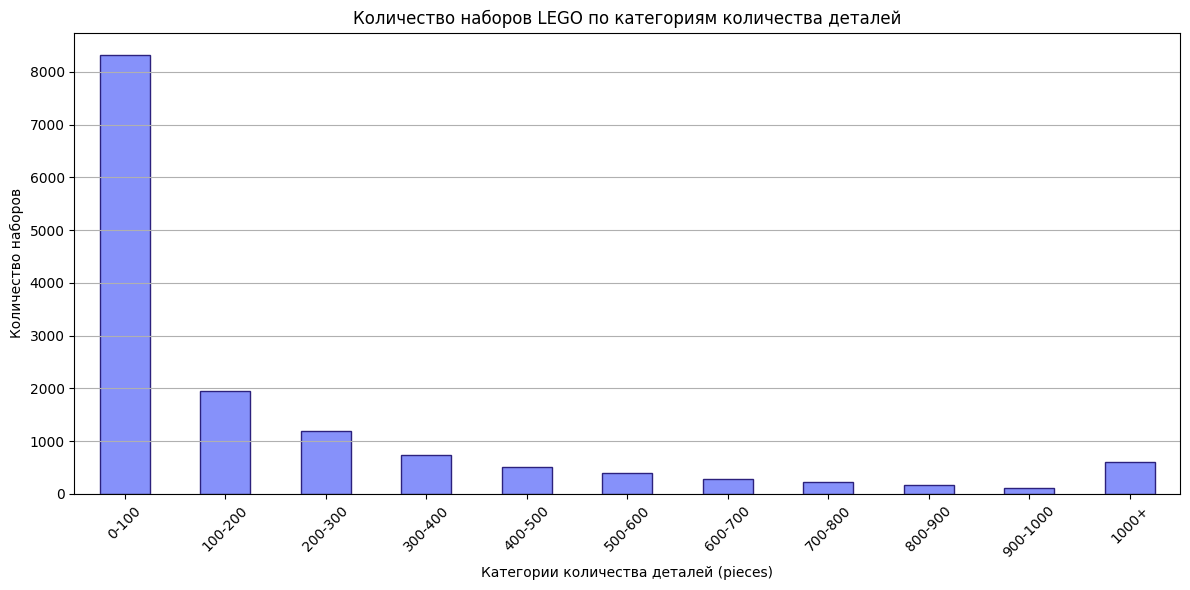

In [25]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, float('inf')]
labels = ['0-100', '100-200', '200-300', '300-400', '400-500', 
          '500-600', '600-700', '700-800', '800-900', '900-1000', '1000+']

# Создадим категориальный столбец
data['pieces_category'] = pd.cut(data['pieces'], bins=bins, labels=labels, right=False)

# Подсчитаем количество наборов в каждой категории
category_counts = data['pieces_category'].value_counts().sort_index()

# Осуществим построение графика
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='#8691fa', edgecolor='#2c217d')
plt.title('Количество наборов LEGO по категориям количества деталей')
plt.xlabel('Категории количества деталей (pieces)')
plt.ylabel('Количество наборов')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Выведем график
plt.tight_layout()
plt.show()

Как оказалось, больше половины наборов из выборки состоят из 1-100 деталей. О чем это может говорить? Во-первых, это может быть связано с маркетинговой стратегией LEGO:
небольшие наборы — способ заинтересовать потенциальынх покупателей брендом, чтобы позже перейти к более сложным и дорогим моделям (о взаимосвязи размера наборов и их стоимости расскажу ниже). 

Необходимо проверить наличие слишком маленьких наборов (+-10 деталей в наборе) для исключения искажения расчетов.

**График 2**

**Зависимость стоимости набора LEGO от года выпуска**

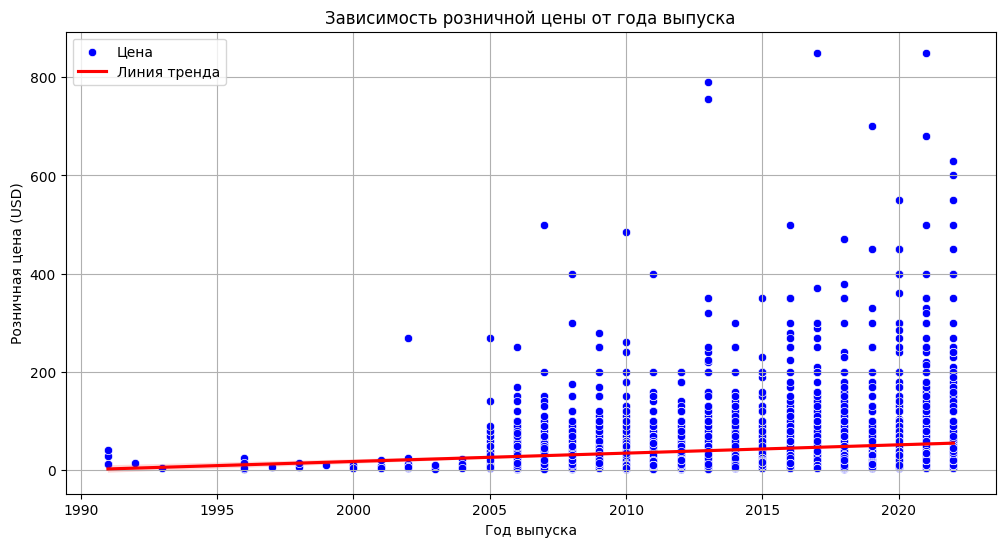

In [45]:
# Отсортируем наборы по году выпуска
data.sort_values('year', inplace=True)

# Настроим график
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='year', y='US_retailPrice', color='blue', label='Цена')

# Добавим линию тренда
sns.regplot(data=data, x='year', y='US_retailPrice', scatter=False, color='red', label='Линия тренда')

# Настроим график
plt.title('Зависимость розничной цены от года выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Розничная цена (USD)')
plt.legend()
plt.grid(True)

# Выведем график
plt.show()

**Самый дорогой набор LEGO**

In [30]:
# Найдем самую высокую стоимость набора LEGO
max_price = data['US_retailPrice'].max()
most_cheap_set = data.loc[data['US_retailPrice'].idxmax()]

# Выведем информацию о самом дорогом наборе LEGO
print(f'Самый дорогой набор LEGO стоил {max_price} долларов США, вот информация о нем:')
print(most_cheap_set)

Самый дорогой набор LEGO стоил 849.99 долларов США, вот информация о нем:
set_id                                                       75192-1
name                                               Millennium Falcon
year                                                            2017
theme                                                      Star Wars
subtheme                                   Ultimate Collector Series
themeGroup                                                  Licensed
category                                                      Normal
pieces                                                        7541.0
minifigs                                                         8.0
agerange_min                                                    16.0
US_retailPrice                                                849.99
bricksetURL                        https://brickset.com/sets/75192-1
thumbnailURL       https://images.brickset.com/sets/small/75192-1...
imageURL           https://im

**Самый дешевый набор LEGO**

In [112]:
# Найдем самую низкую стоимость набора LEGO
min_price = data['US_retailPrice'].min()
most_cheap_set = data.loc[data['US_retailPrice'].idxmin()]

# Выведем информацию о самом дешевом наборе LEGO
print(f'Самый дешевый набор LEGO стоил {min_price} долларов США, вот информация о нем:')
print(most_cheap_set)

Самый дешевый набор LEGO стоил 1.99 долларов США, вот информация о нем:
set_id                                                        8934-1
name                                                      Squid Ammo
year                                                            2007
theme                                                       Bionicle
subtheme                                                 Accessories
themeGroup                                              Constraction
category                                                      Normal
pieces                                                           7.0
minifigs                                                         NaN
agerange_min                                                     NaN
US_retailPrice                                                  1.99
bricksetURL                         https://brickset.com/sets/8934-1
thumbnailURL       https://images.brickset.com/sets/small/8934-1.jpg
imageURL           https://imag

**График 3**

**Топ-10 тем LEGO по количеству наборов**

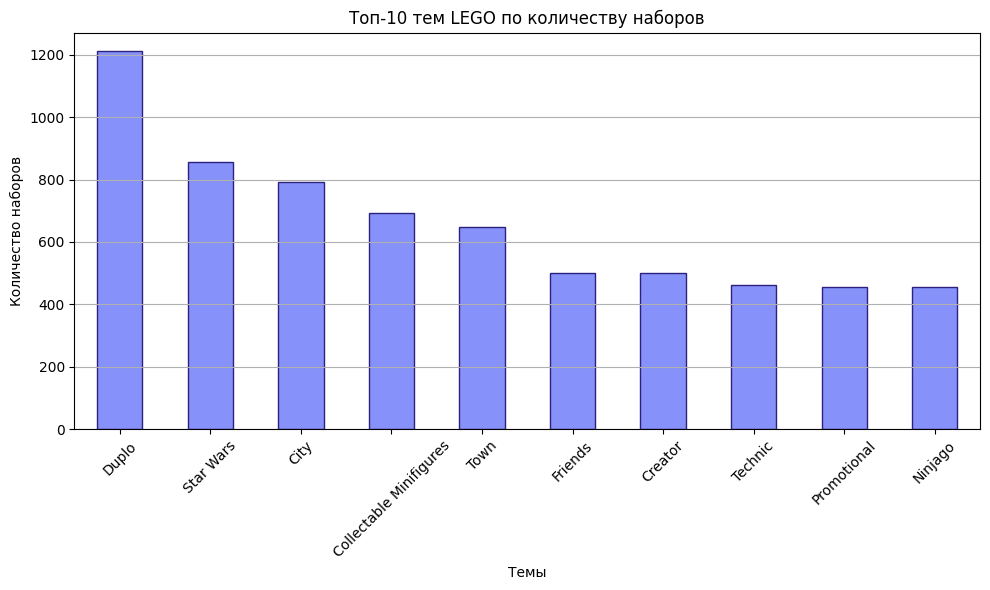

In [31]:
# Отсортируем темы по убыванию количества содержащихся в них наборов
theme_counts = data['theme'].value_counts()

# Получим топ-10 тем
top_10_themes = theme_counts.head(10)

# Настроим диаграмму
plt.figure(figsize=(10, 6))
top_10_themes.plot(kind='bar', color='#8691fa', edgecolor='#2c217d')
plt.title('Топ-10 тем LEGO по количеству наборов')
plt.xlabel('Темы')
plt.ylabel('Количество наборов')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Выведем диаграмму
plt.tight_layout()
plt.show()

Как мы видим, большего всего наборов представлено в тематике LEGO Duplo, что это за тематика? Duplo специально создана для малышей: крупные детали безопасны, удобны для маленьких рук и развивают моторику. Дети теряют/ломают детали, требуя замены или новых наборов, а как мы знаем, - спрос рождает предложение. Лидерство Duplo отражает стратегию LEGO по захвату рынка «с пеленок» и созданию продуктов, которые покупают чаще, регулярнее и на более широкую аудиторию, чем нишевые взрослые коллекции.

**График 4**

**Возрастные категории наборов LEGO**

In [75]:
# Создадим сводную таблицу с информацией о рекомандованном возрасте и количестве соответствующих определенной возрастной маркировке наборов
pd.pivot_table(data, index='agerange_min', values='name', aggfunc='count').reset_index()

,agerange_min,name
0,1.0,81
1,2.0,287
2,3.0,40
3,4.0,267
4,5.0,1477
5,6.0,1363
6,7.0,1152
7,8.0,775
8,9.0,275
9,10.0,275


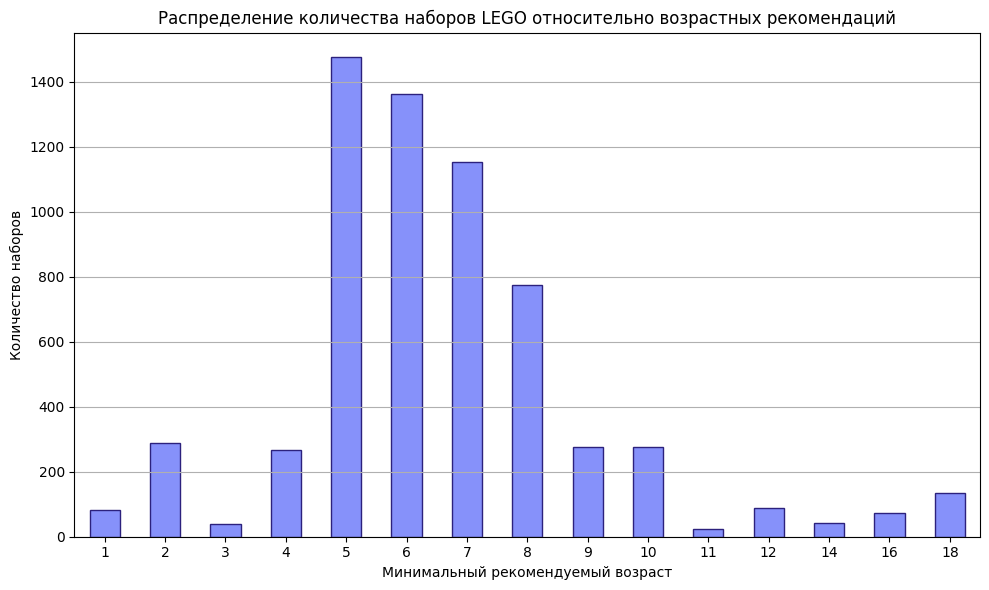

In [32]:
# Подсчитаем количество наборов по возрастным группам
age_counts = data['agerange_min'].value_counts().sort_index()

# Создадим столбчатую диаграмму
plt.figure(figsize=(10, 6))
age_counts.plot(kind='bar', color='#8691fa', edgecolor='#2c217d')
plt.grid(axis='y')

# Настроим график
plt.title('Распределение количества наборов LEGO относительно возрастных рекомендаций')
plt.xlabel('Минимальный рекомендуемый возраст')
plt.ylabel('Количество наборов')

# Установим целочисленные значения по оси X, так как работаем с возрастом в качестве значений
plt.xticks(ticks=range(len(age_counts)), labels=age_counts.index.astype(int), rotation=0)

# Выведем график
plt.tight_layout()
plt.show()

In [53]:
# Фильтрация данных: оставляем только наборы с agerange_min == 5
five_year_sets = data[data['agerange_min'] == 5]

# Получаем уникальные темы и их количество
theme_counts = five_year_sets['theme'].value_counts().reset_index()
theme_counts.columns = ['theme', 'count']  # Переименовываем столбцы

# Вывод результатов
print("Темы и количество наборов для возраста 5+:")
print(theme_counts)

Темы и количество наборов для возраста 5+:
                           theme  count
0        Collectable Minifigures    660
1                           City    436
2                        Friends    101
3                         Disney     40
4                      Star Wars     32
5                       Unikitty     18
6         DC Comics Super Heroes     15
7            Marvel Super Heroes     13
8                           Cars     13
9                         Castle     12
10                          Town     11
11                         Basic     11
12                       Classic     11
13                       Pirates      9
14                       Creator      8
15                  Rock Raiders      7
16           Ben 10: Alien Force      6
17                       Ninjago      6
18                         Space      5
19                      Belville      5
20                       Studios      4
21                  Nexo Knights      4
22                 Miscellaneous     

In [64]:
# Фильтрация данных: оставляем только наборы с agerange_min == 5
new_era = data[data['year'] >= 1991]

# Получаем уникальные темы и их количество
set_counts = new_era['year'].value_counts().reset_index()
set_counts.columns = ['name', 'count']  # Переименовываем столбцы

# Вывод результатов
print("Темы и количество наборов для возраста 5+:")
print(set_counts)

Темы и количество наборов для возраста 5+:
    name  count
0   2022    967
1   2021    944
2   2017    861
3   2020    849
4   2019    848
5   2016    845
6   2018    829
7   2015    808
8   2014    757
9   2013    710
10  2012    703
11  2011    591
12  2010    529
13  2009    487
14  2006    467
15  2002    449
16  2007    449
17  2008    443
18  2003    426
19  2004    419
20  2001    409
21  2005    395
22  2000    384
23  1998    383
24  1999    352
25  1997    264
26  1996    213
27  1995    172
28  1993    168
29  1994    154
30  1991    147
31  1992    112


In [58]:
new_data = pd.read_csv('database.csv')
average_price_per_year = new_data.groupby('year')['US_retailPrice'].mean().reset_index()

# Переименуем столбец для удобства
average_price_per_year.rename(columns={'US_retailPrice': 'average_price'}, inplace=True)

# Вывод результата
print(average_price_per_year)

    year  average_price
0   1970            NaN
1   1971            NaN
2   1972            NaN
3   1973            NaN
4   1974            NaN
5   1975            NaN
6   1976            NaN
7   1977            NaN
8   1978            NaN
9   1979            NaN
10  1980            NaN
11  1981            NaN
12  1982            NaN
13  1983            NaN
14  1984            NaN
15  1985            NaN
16  1986            NaN
17  1987            NaN
18  1988            NaN
19  1989            NaN
20  1990            NaN
21  1991      23.990000
22  1992      14.990000
23  1993       4.990000
24  1994            NaN
25  1995            NaN
26  1996      11.615000
27  1997       6.990000
28  1998      10.990000
29  1999       9.990000
30  2000       6.823333
31  2001       7.990000
32  2002      38.434444
33  2003       7.865000
34  2004      45.418571
35  2005      36.338837
36  2006      35.331014
37  2007      28.695753
38  2008      30.869785
39  2009      33.100849
40  2010      28

In [59]:
# Фильтруем данные для наборов с годом выпуска >= 1991
filtered_df = new_data[new_data['year'] >= 1991]

# Группировка по году и вычисление средней стоимости
average_price_per_year = filtered_df.groupby('year')['US_retailPrice'].mean().reset_index()

# Переименуем столбец для удобства
average_price_per_year.rename(columns={'US_retailPrice': 'average_price'}, inplace=True)

# Вывод результата
print(average_price_per_year)

    year  average_price
0   1991      23.990000
1   1992      14.990000
2   1993       4.990000
3   1994            NaN
4   1995            NaN
5   1996      11.615000
6   1997       6.990000
7   1998      10.990000
8   1999       9.990000
9   2000       6.823333
10  2001       7.990000
11  2002      38.434444
12  2003       7.865000
13  2004      45.418571
14  2005      36.338837
15  2006      35.331014
16  2007      28.695753
17  2008      30.869785
18  2009      33.100849
19  2010      28.273186
20  2011      26.816355
21  2012      29.907772
22  2013      36.619038
23  2014      33.364754
24  2015      33.543634
25  2016      35.849785
26  2017      38.543671
27  2018      37.828330
28  2019      40.512344
29  2020      46.772468
30  2021      52.953929
31  2022      52.575917


Как мы видим из графика и его дополнительного анализа, - самая распространенная возрастная категория наборов LEGO - 5+. Это можно объяснить тем, что в данном возрасте у детей улучшается усидчивость и концентрация внимания, развивается исследовательский интерес, появляется потребность в развитии мелкой моторики. 

А самые распространенные тематики в этой возрастной категории - Collectable Minifigures и City. Серия минифигурок построена на принципе «слепых пакетов», что стимулирует повторные покупки. Дети 5+ уже способны увлекаться коллекционированием, обмениваться фигурками и играть в «угадайку» при покупке. Тема City (полиция, пожарные, стройка) имитирует реальный мир, что понятно детям 5–7 лет. Ребёнок легко включается в ролевые игры без сложного погружения в фэнтези-сюжеты (как Ninjago или Harry Potter). 

Помимо этого играет свою роль и маркетинг для родителей:
акцент на «развивающий» характер City и «коллекционную ценность» минифигурок помогает продавать их как «полезные» подарки. Все это объясняет стратегию LEGO в выборе тематик наборов для детей 5+ лет.

**График 5**

**Количество деталей в зависимости от возрастных рекомендаций**

In [84]:
# Создадим сводную таблицу с информацией о среднем количестве деталей в наборах с определенными возрастными маркировками
pd.pivot_table(data, index='agerange_min', values='pieces', aggfunc='mean').reset_index().sort_values(by='agerange_min').reset_index(drop=True)

,agerange_min,pieces
0,1.0,32.271605
1,2.0,49.331010
2,3.0,74.800000
3,4.0,232.456929
4,5.0,82.165200
5,6.0,141.465150
6,7.0,232.105035
7,8.0,464.403871
8,9.0,801.734545
9,10.0,502.869091


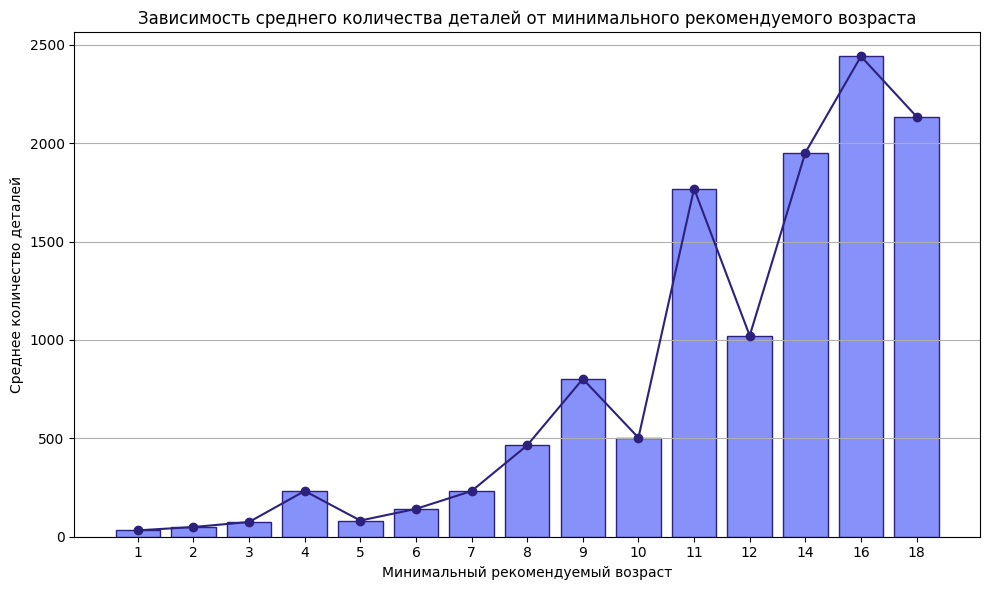

In [34]:
# Предполагаем, что data уже загружен
pivot_table = data.pivot_table(index='agerange_min', values='pieces', aggfunc='mean').reset_index()
pivot_table.columns = ['agerange_min', 'average_pieces']
pivot_table = pivot_table.sort_values(by='agerange_min').reset_index(drop=True)

# Построим график
plt.figure(figsize=(10, 6))

# Используем позиции для равномерного распределения
x_positions = np.arange(len(pivot_table['agerange_min']))
bar_width = 0.8  # Ширина столбцов

# Зададим цвет для графика
plt.bar(x_positions, pivot_table['average_pieces'], width=bar_width, color='#8691fa', edgecolor='#2c217d')

# Нарисуем линию
plt.plot(x_positions, pivot_table['average_pieces'], color='#2c217d', marker='o')

# Настроим график
plt.title('Зависимость среднего количества деталей от минимального рекомендуемого возраста')
plt.xlabel('Минимальный рекомендуемый возраст')
plt.ylabel('Среднее количество деталей')
plt.grid(axis='y')

# Убедимся, что метки оси X - целые числа
plt.xticks(x_positions, labels=[int(x) for x in pivot_table['agerange_min']])

# Выведем график
plt.tight_layout()
plt.show()

В целом, чем выше возрастная рекомендация (agerange_min), тем больше деталей в наборе. На графике мы наблюдаем несколько достаточно резких скачков, и вот как можно объяснить такую особенность.

- ***3→4 года:***

    74 → 232 детали (+212%) — выдвину предположение (подтвержу это позже), что в этом возрасте происходит переход от Duplo к «обычным» наборам.

- ***7→8 лет:***

    232 → 464 детали (+100%) — начало сложных моделей. В 8 лет мозг ребенка претерпевает значительные изменения, связанные с развитием когнитивных функций, укреплением нейронных связей и формированием навыков. Улучшается произвольность, формируются навыки критического мышления и способность к абстрактному мышлению. Поэтому вполне понятна стратегия LEGO по усложнению наборов для данной возрастной категории.

- ***10→11 лет:***

    502 → 1768 деталей (+252%) — В 11 лет мозг ребенка активно перестраивается, готовясь к подростковому периоду. Происходит интенсивное развитие лобных долей, отвечающих за планирование, самоорганизацию, контроль эмоций и когнитивные функции. Улучшаются межполушарные связи, что отражается на внимании, речи, восприятии и зрительно-пространственных представлениях. Ребенок начинает мыслить абстрактно, выдвигать гипотезы и решать задачи, требующие логического мышления. В связи с этим LEGO предполагает, что в 11 лет целесообразен выход на уровень «экспертных» наборов, которые, благодаря своей сложности, позволят сохранить интерес подростков.



*В возрасте 4 лет действительно происходит переход от Duplo к "обычным" наборам, это подтверждается тем, что среди наборов с возрастной маркировкой  3+ существует 12 наборов LEGO Duplo, что составляет 30% от всех наборов 3+. А среди наборов с возрастной маркировкой 4+ существует всего один набор LEGO Duplo, что составляет 0,3 процента от общего количества таких наборов.*

In [51]:
# Фильтрация данных: оставляем только наборы с agerange_min == 3
five_year_sets = data[data['agerange_min'] == 3]

# Получаем уникальные темы и их количество
theme_counts = five_year_sets['theme'].value_counts().reset_index()
theme_counts.columns = ['theme', 'count']  # Переименовываем столбцы

# Вывод результатов
print("Темы и количество наборов для возраста 3+:")
print(theme_counts)

Темы и количество наборов для возраста 3+:
       theme  count
0      Basic     14
1      Duplo     12
2   Fabuland      7
3  Education      5
4  Freestyle      2


In [52]:
# Фильтрация данных: оставляем только наборы с agerange_min == 4
five_year_sets = data[data['agerange_min'] == 4]

# Получаем уникальные темы и их количество
theme_counts = five_year_sets['theme'].value_counts().reset_index()
theme_counts.columns = ['theme', 'count']  # Переименовываем столбцы

# Вывод результатов
print("Темы и количество наборов для возраста 4+:")
print(theme_counts)

Темы и количество наборов для возраста 4+:
                       theme  count
0                    Juniors     57
1            Bricks and More     46
2                    Classic     46
3                     Disney     23
4                       City     16
5        Marvel Super Heroes     14
6                    Friends     11
7                    Ninjago      8
8                  Education      8
9                Promotional      7
10                 Star Wars      6
11            Jurassic World      4
12                   Creator      3
13               Bulk Bricks      3
14    DC Comics Super Heroes      3
15                      Town      2
16  Minions: The Rise of Gru      2
17         Trolls World Tour      2
18                     Basic      1
19                 Freestyle      1
20                     Duplo      1
21                  Seasonal      1
22           Make and Create      1
23          The LEGO Movie 2      1


Аномалии учту позже при работе с выбросами

# Матрица корреляции

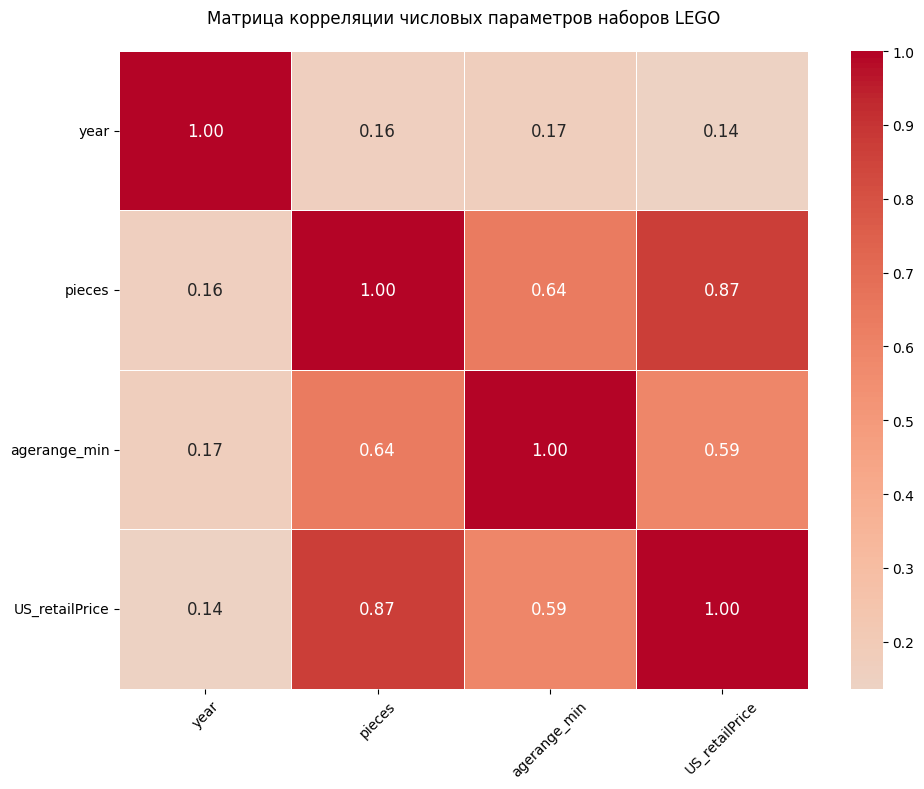

In [4]:
df = pd.read_csv('database.csv')
df = df[df['pieces'] > 0]

# Выберем только числовые столбцы для корреляционного анализа
numeric_cols = ['year', 'pieces', 'agerange_min', 'US_retailPrice']
numeric_df = df[numeric_cols]

# Рассчитаем матрицу корреляции
corr_matrix = numeric_df.corr()

# Визуализируем матрицу корреляции
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0,
            linewidths=0.5,
            annot_kws={"size": 12})
plt.title('Матрица корреляции числовых параметров наборов LEGO', pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Интерпретация и анализ значений коэффициента корреляции**

**1. Год выпуска и другие параметры**
Год и количество деталей (0.16):
Слабая положительная связь означает, что современные наборы LEGO в среднем содержат немного больше деталей, но эта тенденция выражена неявно. 

Возможные причины:

- Компания сохраняет баланс между сложными и простыми наборами каждый год.

- Новые технологии производства позволяют создавать более детализированные модели без резкого увеличения количества деталей.

Год и возрастная категория (0.17):
Минимальная связь говорит о том, что возрастные рекомендации почти не зависят от года выпуска. LEGO придерживается стабильных стандартов сложности для разных возрастов.

Год и стоимость (0.14):
Почти отсутствующая корреляция, несмотря на неполные данные (38% заполненности). Это может указывать на:

- Стабильность ценовой политики с поправкой на инфляцию.

- Разнонаправленные тренды: некоторые темы дешевеют (массовые серии), другие дорожают (коллекционные наборы).

**Вывод:** Год выпуска слабо влияет на ключевые параметры наборов. Основные изменения касаются дизайна и тематик, а не базовых характеристик.

**2. Количество деталей и возрастная категория (0.64)**

Умеренно сильная корреляция подтверждает логичную зависимость:

- Для малышей (1–4 года):
Наборы Duplo содержат мало деталей (32–230), так как акцент делается на безопасность и простоту сборки.

- Для детей 5–12 лет:
Постепенный рост сложности (80–1000 деталей) соответствует развитию моторики и усидчивости.

- Для 12+ лет:
Крупные коллекционные наборы (1000+ деталей) требуют высокой концентрации.

Исключения:
Некоторые наборы для младших возрастов могут иметь много деталей (например, LEGO Classic с 1500+ элементами для творчества), а взрослые наборы — мало (минифигурки Collectible). Это снижает корреляцию до 0.64 вместо 0.8+.

**3. Количество деталей и стоимость (0.87)**
Сильнейшая корреляция в датасете объясняется:

Основой ценообразования LEGO:
Стоимость напрямую зависит от количества деталей и их уникальности. Например:

Набор из 100 деталей: $10–20.

Набор из 2000 деталей: $200–300.

Экономика производства:
Больше деталей → выше затраты на материалы, логистику и упаковку.

Нюансы:
Некоторые темы (Star Wars, Architecture) имеют премиальную наценку из-за лицензионных отчислений или сложности дизайна. Это может объяснить выбросы в данных.

**4. Возрастная категория и стоимость (0.59)**
Умеренная связь обусловлена двумя факторами:

Зависимостью от количества деталей:
Как показано выше, возраст и число деталей коррелируют (0.64), а детали и цена — ещё сильнее (0.87).

Спецификой тематик:

Дорогие наборы для взрослых (18+) — архитектурные серии или Technic.

Бюджетные линейки для детей (4–7 лет) — City, Friends.


***Общие выводы:***
1. Главный драйвер стоимости — количество деталей (0.87). Это ключевой параметр для прогнозирования цены.

2. Возрастные рекомендации в основном отражают сложность сборки через объем деталей (0.64), но не являются жестким правилом.

3. Год выпуска почти не влияет на анализируемые параметры — стратегия LEGO консервативна в базовых характеристиках.

Проблемы данных:

Неполнота цен (38% заполненности) могла исказить корреляции с участием US_retailPrice.

В дальнейшем предстоит проверить медианные значения и удалить выбросы (например, гигантские наборы >5000 деталей).

**Итог:** Данные подтверждают, что LEGO строит свою продуктовую матрицу вокруг принципа «больше деталей — сложнее — дороже», но сохраняет гибкость для разных возрастных групп и тематик.

# Задача, которую должна будет решать модель

В ходе EDA и research-анализа я поняла, что наиболее актуальной будет задача классификации наборов LEGO по возрастным категориям (agerange_min) на основе количества деталей (pieces) и тематики (theme).

# Подготовка данных (Feature Engineering)

**Обработка категориального признака theme**

Поскольку theme — это текстовая переменная с множеством категорий, применим Target Encoding (кодирование средним значением целевой переменной для каждой темы):

In [71]:
# Кодируем тему средним рекомендуемым возрастом для этой темы
df['theme_encoded'] = df.groupby('theme')['agerange_min'].transform('mean')

In [79]:
# Среднее количество деталей по темам
df['avg_pieces_per_theme'] = df.groupby('theme')['pieces'].transform('mean')

**Проанализируем распределение pieces и проверим его скошенность (асимметрию)**

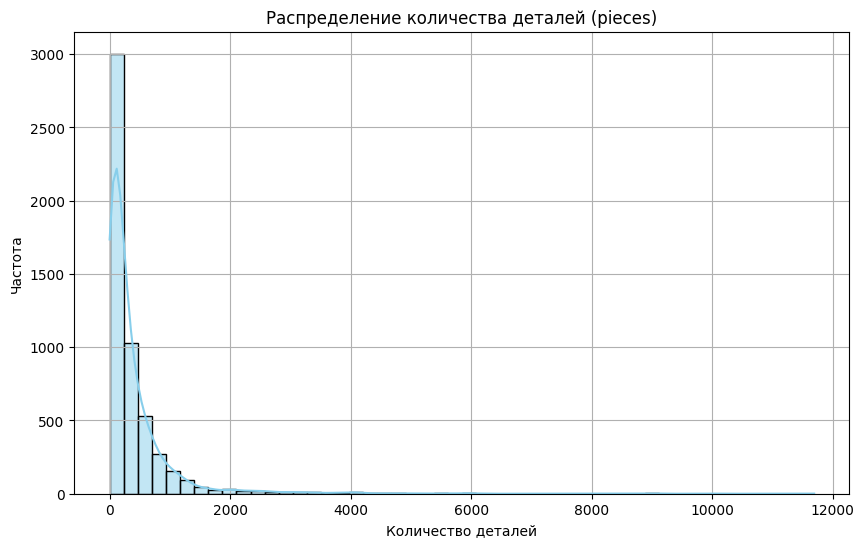

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(df['pieces'], bins=50, kde=True, color='skyblue')
plt.title('Распределение количества деталей (pieces)')
plt.xlabel('Количество деталей')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

По графику видим, что распределение имеет "длинный хвост" вправо — это правосторонняя скошенность (большинство наборов с малым числом деталей, но есть выбросы с огромным количеством).

Чтобы убедиться, посчитаем коэффициент скошенности

In [74]:
# Коэффициент скошенности (Skewness)
from scipy.stats import skew

skewness = skew(df['pieces'].dropna())
print(f"Коэффициент скошенности: {skewness:.2f}")

Коэффициент скошенности: 5.83


Расчеты пдтверждают сильную правостороннюю скошенность

Посчитаем коэффициент эксцессов. Он показывает "остроту" пиков и тяжесть хвостов.

In [75]:
from scipy.stats import kurtosis

kurt = kurtosis(df['pieces'].dropna())
print(f"Коэффициент эксцесса: {kurt:.2f}")

Коэффициент эксцесса: 55.60


Из расчета видим тяжелые хвосты (много выбросов)

Прибегнем к использованию описательной статистики

In [76]:
print(df['pieces'].describe())

count     5322.000000
mean       384.980083
std        656.793561
min          0.000000
25%         66.000000
50%        190.000000
75%        450.000000
max      11695.000000
Name: pieces, dtype: float64


**Выводы:**

- Медиана (190) < Среднего (384) — подтверждает правостороннюю скошенность.
- 75% наборов имеют ≤ 300 деталей, но есть наборы с 10 000 деталей.

- Необходимо использовать log_pieces в моделях (например, для линейной регрессии).
- Для Tree-based моделей (Random Forest, XGBoost) можно оставить исходные значения.

**Логарифмирование pieces**

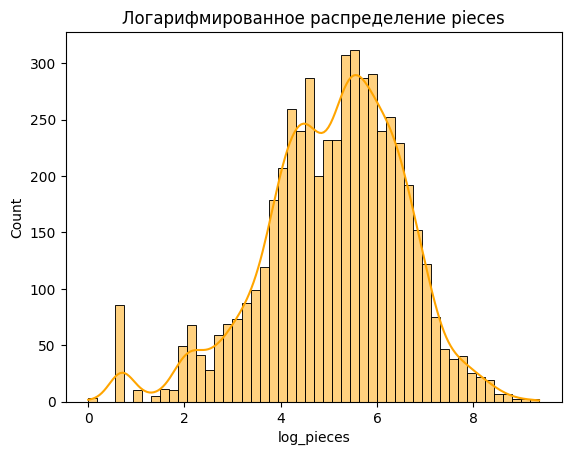

In [77]:
df['log_pieces'] = np.log1p(df['pieces'])  # log1p для обработки нулей
sns.histplot(df['log_pieces'], bins=50, kde=True, color='orange')
plt.title('Логарифмированное распределение pieces')
plt.show()

**Обработка пропусков US_retailPrice**

In [78]:
df['US_retailPrice'] = df['US_retailPrice'].fillna(df['US_retailPrice'].median())

**Обработка пропусков agerange_min**

In [82]:
df = df.dropna(subset=['agerange_min'])

In [88]:
df.head()

,set_id,name,year,theme,subtheme,themeGroup,category,pieces,minifigs,agerange_min,...,log_price,avg_price_by_theme,avg_pieces_by_theme,theme_encoded,theme_freq,years_since_release,decade,name_length,has_star_wars,avg_pieces_per_theme
2111,2304-1,Large Building Plate,1992,Duplo,NaN,Pre-school,Normal,1.0,NaN,1.0,...,2.771964,30.250870,38.156069,1.808307,1275,31,1990,20,0,41.464531
2677,626-1,"Building Plate, Green",1996,Basic,Supplementaries,Basic,Normal,1.0,NaN,4.0,...,1.790091,7.490000,180.061275,4.000000,416,27,1990,21,0,1.000000
4662,10115-1,Jumper Bricks,2001,Bulk Bricks,NaN,Basic,Normal,80.0,NaN,4.0,...,1.790091,6.541724,53.574468,5.500000,141,22,2000,13,0,59.448276
5049,10030-1,Imperial Star Destroyer,2002,Star Wars,Ultimate Collector Series,Licensed,Normal,3096.0,NaN,16.0,...,5.602082,67.095055,396.428904,8.538660,863,21,2000,23,0,585.687090
5083,10076-1,Technic Gear Wheels,2002,Bulk Bricks,Technic,Basic,Normal,39.0,NaN,7.0,...,2.638343,6.541724,53.574468,5.500000,141,21,2000,19,0,59.448276


**Логистическая регрессия**

In [89]:
# Выбор признаков и целевой переменной
X = df[['pieces', 'theme_encoded', 'avg_pieces_per_theme']]
y = df['agerange_min']  # Целевая переменная (возрастные категории)

# Стандартизация числовых признаков (логистическая регрессия чувствительна к масштабу)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [90]:
# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [91]:
# Создание и обучение модели
# Для многоклассовой классификации используем `multi_class='multinomial'`
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    multi_class='multinomial',  # Возрастных категорий > 2
    solver='lbfgs',            # Оптимизатор для многоклассовой задачи
    max_iter=1000              # Увеличиваем, если модель не сходится
)
model.fit(X_train, y_train)

c:\Users\Mel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

**Precision, recall, f1, accuracy**

In [95]:
from sklearn.metrics import classification_report, accuracy_score
# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Оценка качества
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        17
         2.0       0.69      0.98      0.81        42
         3.0       0.00      0.00      0.00         2
         4.0       0.86      0.12      0.21        51
         5.0       0.64      0.87      0.74       115
         6.0       0.66      0.64      0.65       180
         7.0       0.59      0.76      0.66       189
         8.0       0.53      0.54      0.54       134
         9.0       0.12      0.07      0.09        44
        10.0       0.84      0.58      0.68        45
        11.0       0.00      0.00      0.00         1
        12.0       0.00      0.00      0.00         9
        14.0       0.00      0.00      0.00         8
        16.0       0.33      0.06      0.10        18
        18.0       0.41      0.61      0.49        23

    accuracy                           0.59       878
   macro avg       0.38      0.35      0.33       878
weighted avg       0.58   

c:\Users\Mel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mel\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

**ROC-AUC**

In [96]:
from sklearn.metrics import roc_auc_score
# One-vs-Rest (OvR) подход
y_proba = model.predict_proba(X_test)
roc_auc = roc_auc_score(
    y_test,
    y_proba,
    multi_class='ovr',  # Или 'ovo'
    average='macro'
)
print(f"ROC-AUC (OvR): {roc_auc:.2f}")

ROC-AUC (OvR): 0.94


**Интерпретация результатов**

**Accuracy: 0.59** - модель правильно предсказала 2 из 3 примеров

**Precision: 0 для категорий 1+, 3+, 11+, 12+, 14+** - возможно проблема в недостаточности данных

**ROC-AUC (OvR): 0.94** - модель хорошо разделяет классы

## Построение матрицы ошибок (Confusion Matrix)

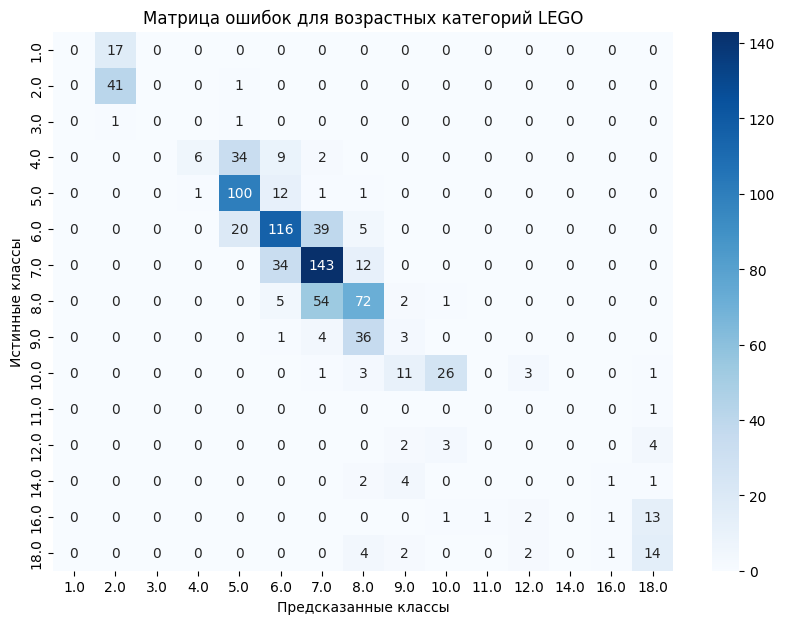

In [97]:
from sklearn.metrics import confusion_matrix
# Предсказанные и истинные значения
y_pred = model.predict(X_test)

# Создание матрицы ошибок
cm = confusion_matrix(y_test, y_pred)

# Визуализация
plt.figure(figsize=(10, 7))
sns.heatmap(cm, 
            annot=True, 
            fmt='d', 
            cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Матрица ошибок для возрастных категорий LEGO')
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.show()

**Нормализованная матрица ошибок**

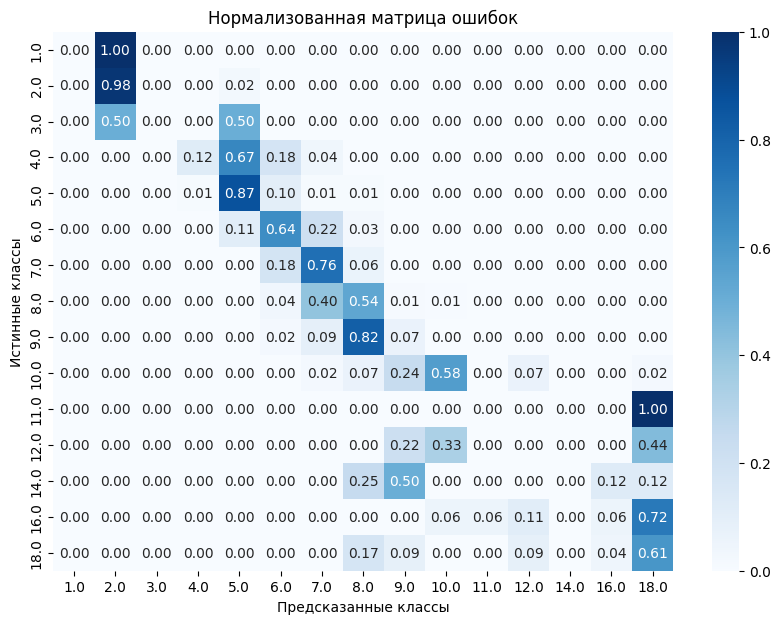

In [98]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, 
            annot=True, 
            fmt='.2f', 
            cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title('Нормализованная матрица ошибок')
plt.xlabel('Предсказанные классы')
plt.ylabel('Истинные классы')
plt.show()

Как мы видим, логичтическая регрессия сработала не лучшим образом. Имеет место рассмотрение других моделей.

## Эксперименты с моделями машинного и глубокого обучения

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

lr_model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced'
)

**Деревья: Random Forest**

In [107]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42
)

**Градиентный бустинг: XGBoost**

In [108]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    objective='multi:softmax',
    eval_metric='mlogloss',
    num_class=len(y.unique()),
    random_state=42
)

AttributeError: 'numpy.ndarray' object has no attribute 'unique'

**Нейронные сети: Простой перцептрон**

In [109]:
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    max_iter=500,
    random_state=42
)

### Кроссвалидация и сравнение моделей

In [110]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler


# Стратифицированная кросс-валидация (сохраняет баланс классов)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model,
    'Neural Network': nn_model
}

results = {}
for name, model in models.items():
    scores = cross_val_score(
        model, X_scaled, y, cv=cv, 
        scoring='f1_macro', n_jobs=-1
    )
    results[name] = {
        'Mean F1': np.mean(scores),
        'Std F1': np.std(scores)
    }

# Результаты
results_df = pd.DataFrame(results).T.sort_values('Mean F1', ascending=False)
print(results_df)

                      Mean F1    Std F1
Neural Network       0.553144  0.019711
Random Forest        0.525052  0.016784
Logistic Regression  0.374329  0.016935


## Общий вывод

В ходе работы был проведен анализ датасета. Были выявлены взаиммосвязи между различными полями таблицы, что отражено в матрице корреляции. Задачей для модели послужила классификация наборов LEGO по возрастным категориям, исходя из значений количества деталей в наборе и тематики. Данные были подготовлены для создания простой модели. Были обработы пропуски и добавлены новые поля. К сожалению, не удалось достичь хороших результатов для какой-либо модели. Возможно, задача была составлена не вполне корректно, или данных было недостаточно. В любом случае, было интересно погрузится в тему Data Science, попробовать себя в этом. 